In [39]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt  

raw_data = pd.read_csv("/content/drive/MyDrive/enhanceIT/file2.csv")

raw_data = raw_data[raw_data.sqrt_ft != "None" ]
raw_data = raw_data[raw_data.sqrt_ft != 0 ]
raw_data["sqrt_ft"] = pd.to_numeric(raw_data["sqrt_ft"])
raw_data = raw_data[raw_data.sqrt_ft <= 3500]
raw_data["x"] = raw_data.sold_price / raw_data.sqrt_ft
raw_data = raw_data[raw_data.sold_price <= 1500000]
raw_data = raw_data[raw_data.x > 150]



data2 = raw_data
data = raw_data

new_data_np = data.to_numpy()

# dictionary of price_per_sq for each zipcodes
zipcode_dict = {}
for i in new_data_np:
  if i[2] in zipcode_dict:
    zipcode_dict[i[2]].append(i[3])
  else:
    zipcode_dict[i[2]] = [i[3]]


# get list of zipcodes with more than 5 observations
# note that I did not changed the name of the list
zip_count = {}
zip_30_more = []
zipcodes = list(zipcode_dict.keys())
for i in zipcodes:
  zip_count[i] = len(zipcode_dict[i])
  if len(zipcode_dict[i])> 5:
    zip_30_more.append(i)

temp_d = data[data.zipcode == zip_30_more[0]]
for i in range(1,len(zip_30_more)):
  temp_d = pd.concat([temp_d, data[data.zipcode == zip_30_more[i]]], ignore_index=True, sort=False)
data = temp_d

def R2 (y,y_hat):
  return (1 - (np.sum((y-y_hat)**2)/np.sum((y-np.mean(y))**2)))

def drop_null_values(data, print_process = False):
  
  data_before = data.count()
  temp = data.dropna()

  data_after = temp.count()
  if print_process:
    print("Data before dropping null values:")
    print(data_before)

    print()
    print("Data after dropping:")
    print(data_after)
  
  return temp

# drop null values 
data  = drop_null_values(data)
# select columns
cols_to_select = ["x","sqrt_ft","taxes","longitude","latitude","HOA"]
train_data = data[cols_to_select]


class KNNClassifier ():

  def fit(self,x,y):
    self.x = x
    self.y = y
  
  def predict (self, x, k, epsilon = [1e-5]):
    N = len(x)
    y_hat = np.zeros((len(epsilon),N))

    for i in range(N):
      dist_sq = np.sum((self.x - x[i])**2, axis = 1)
      index = np.argsort(dist_sq)[:k]
      
      temp = dist_sq[index]
      for j,e in enumerate(epsilon):
        gamma_k = 1/(np.sqrt(temp+e))
        y_hat[j][i] = np.bincount(self.y[index],weights=gamma_k).argmax()

    return y_hat

# split test set into validation and actual test set
vald_set = train_data.sample(frac = 0.2,random_state =45)
train_data = train_data.drop(vald_set.index)

test_set = vald_set.sample(frac = 0.5,random_state = 15)
vald_set = vald_set.drop(test_set.index)


def pd_to_np (data):
  data_np = data
  x = data_np[:,1:]
  x = x.astype(int)
  y = data_np[:,0]
  y = y.astype(int)


  return x,y
# bin size
nn = 5
# obtain x and y values for both data
train_data = train_data.to_numpy()
for i in range(len(train_data)):
  x = train_data[i][0]
  train_data[i][0] = int(round(x/nn)*nn*1.0)
x_train,y_train = pd_to_np(train_data)
print(y_train)
vald_set =vald_set.to_numpy()
for i in range(len(vald_set)):
  x = vald_set[i][0]
  vald_set[i][0] = int(round(x/nn)*nn*1.0)
vald_x,vald_y = pd_to_np(vald_set)




# change valid and test datat to np
vald_x,vald_y = pd_to_np(vald_set)
test_x,test_y = pd_to_np(test_set.to_numpy())


knn = KNNClassifier()
knn.fit(x_train,y_train)

k = [1,5,7,10,15,20,30,40,50,70,100]
for i in k:
  print(i)
  y_hat = knn.predict(vald_x,i)
  print(R2(vald_y,y_hat))


y_hat2 = knn.predict(test_x,20)
print(R2(test_y,y_hat2[0]))

r = test_y-y_hat2[0]

[260 310 220 ... 200 210 250]
1
0.07116123593799051
5
0.15858491378000994
7
0.2812503164268574
10
0.20743932198584436
15
0.2730827063862534
20
0.27641025121761054
30
0.2913842029587177
40
0.2880566581273606
50
0.2750489828775099
70
0.2597725270608249
100
0.21379190757298072
0.3621641995599596


2330


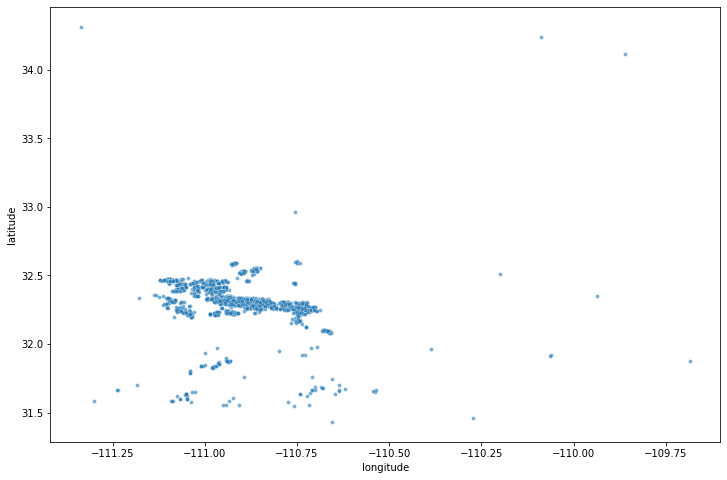

In [34]:
print(len(data))

fig = plt.gcf()
fig.set_size_inches(12, 8)
g = sns.scatterplot(data =data2, x = "longitude", y = "latitude", s = 15, alpha = 0.6 )



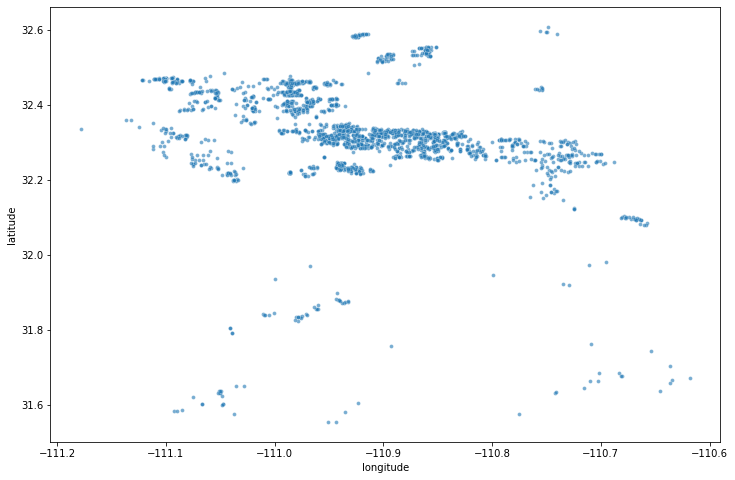

In [32]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
g = sns.scatterplot(data =data, x = "longitude", y = "latitude", s = 15, alpha = 0.6 )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'residual vs y_hat')

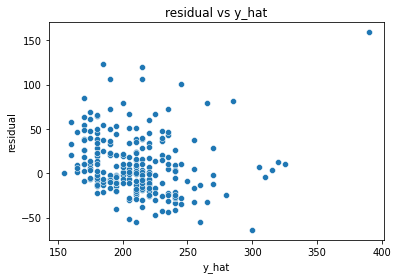

In [38]:
sns.scatterplot (y_hat2[0],r)
plt.xlabel("y_hat")
plt.ylabel("residual")
plt.title("residual vs y_hat")

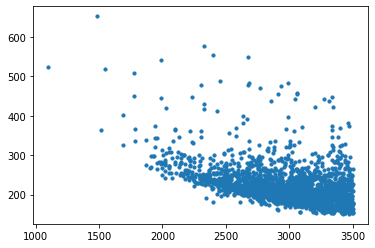

In [ ]:
plt.scatter(data.sqrt_ft,data.x, s = 10)